In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#import seaborn as sbs

DATA **collection

In [63]:
BBK_2016 = pd.read_csv('BKK-2016.csv')
BBK_2017 = pd.read_csv('BKK-2017.csv')
BBK_2018 = pd.read_csv('BKK-2018.csv')
BBK_2019 = pd.read_csv('BKK-2019.csv')
BBK_2020 = pd.read_csv('BKK-2020.csv')
BBK_2021 = pd.read_csv('BKK-2021.csv')
BBK_2022 = pd.read_csv('BKK-2022.csv')
BBK_2023 = pd.read_csv('BKK-2023.csv')


In [64]:
merged_df = pd.concat([BBK_2016, BBK_2017, BBK_2018, BBK_2019, BBK_2020, BBK_2021, BBK_2022, BBK_2023], ignore_index=True)
print(merged_df)

           date   pm25
0     30/7/2016     61
1     31/7/2016     68
2      1/8/2016     60
3      2/8/2016     68
4      3/8/2016     70
...         ...    ...
2554   6/8/2023     57
2555   7/8/2023     57
2556   8/8/2023     56
2557   9/8/2023     63
2558  10/8/2023     68

[2559 rows x 2 columns]


In [65]:
merged_df

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [66]:
merged_df.to_csv("BKK_PM_All.csv", index=False)

Data cleaning and Data Preprocessing 

In [16]:
df_train = pd.read_csv('BKK_PM_All.csv')
df_train 

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [17]:
#Check missing value
print('Number of missing valuen : ',df_train[' pm25'].isnull().sum())
# Drop last Date is null 
df_train.dropna(subset=['date'], inplace=True)   
df_train

Number of missing valuen :  0


,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [18]:
#df_train = df_train[~df_train.apply(lambda row: any(val.strip() == '' for val in row), axis=1)]
#df_train

In [19]:
df_train[' pm25']=df_train[' pm25'].shift(-15).rolling(30,min_periods=1).mean()
df_train

,date,pm25
0,30/7/2016,68.000000
1,31/7/2016,68.000000
2,1/8/2016,68.000000
3,2/8/2016,69.750000
4,3/8/2016,72.800000
...,...,...
2554,6/8/2023,59.578947
2555,7/8/2023,60.055556
2556,8/8/2023,60.294118
2557,9/8/2023,60.625000


In [21]:
df_train2 =df_train.copy()

In [22]:
df_train2

,date,pm25
0,30/7/2016,68.000000
1,31/7/2016,68.000000
2,1/8/2016,68.000000
3,2/8/2016,69.750000
4,3/8/2016,72.800000
...,...,...
2554,6/8/2023,59.578947
2555,7/8/2023,60.055556
2556,8/8/2023,60.294118
2557,9/8/2023,60.625000


<Axes: >

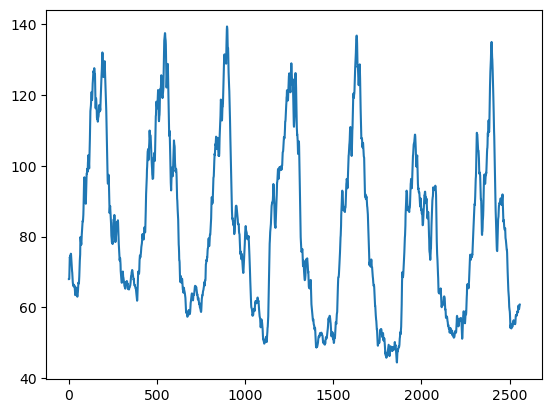

In [23]:
fig, ax = plt.subplots()

df_train[' pm25'].rolling(1).mean().plot()

In [24]:
def create_fea(df):
    df['PM2.5_ma20'] = df_train[' pm25'].shift(-7).rolling(14,min_periods=1).mean()
    date_time = pd.to_datetime(df['date'],format='%d/%m/%Y')
    
    df['day']=date_time.dt.strftime("%d").astype('int')
    df['month']=date_time.dt.strftime("%m").astype('int')
    df['year']=date_time.dt.strftime("%Y").astype('int')
    
    df['y_day']=getattr(date_time.dt, 'dayofyear')
    df['y_quarter']=getattr(date_time.dt, 'quarter')
    #df['y_week']=getattr(date_time.dt, 'weekofyear')
    
    lags = [7,30,365]
    lag_cols = [f"lag_{lag}" for lag in lags]
    for lag, lag_col in (zip(lags, lag_cols)):
        df[lag_col] = df[" pm25"].shift(lag)
        
    wins = [5,30]
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rmean_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).mean())
    
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rstd_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).std())

In [25]:
create_fea(df_train)
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,30/7/2016,68.000000,74.625000,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.000000,74.479167,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.000000,74.419444,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.750000,74.473674,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.800000,74.612273,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2555,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2556,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2557,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


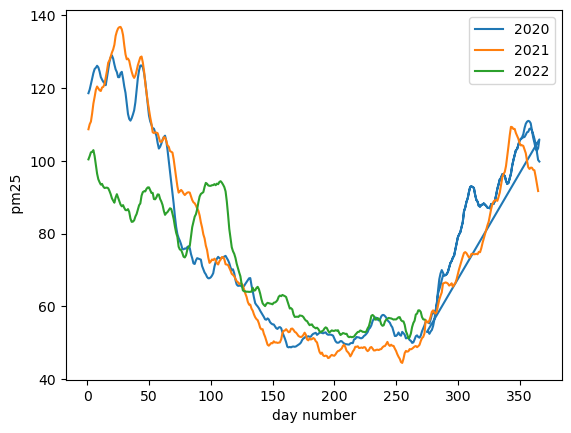

In [26]:
fig, ax = plt.subplots()
#ax.plot(df_train.loc[df_train['year']==2016]['y_day'],df_train.loc[df_train['year']==2016][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2018]['y_day'],df_train.loc[df_train['year']==2018][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2019]['y_day'],df_train.loc[df_train['year']==2019][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2020]['y_day'],df_train.loc[df_train['year']==2020][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2021]['y_day'],df_train.loc[df_train['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2022]['y_day'],df_train.loc[df_train['year']==2022][' pm25'].rolling(1).mean())


ax.set_xlabel('day number')
ax.set_ylabel(' pm25')
plt.legend(['2020', '2021', '2022'])

In [27]:
df_train.dropna(inplace = True)
df_train.reset_index(drop=True,inplace=True)
df_train.shape

(2165, 23)

In [28]:
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,29/8/2017,70.133333,68.750000,29,8,2017,241,3,61.900000,68.800000,...,66.257767,66.631111,67.482222,70.457025,0.759386,0.634910,0.188225,2.462748,2.019441,3.372741
1,30/8/2017,70.200000,69.595238,30,8,2017,242,3,62.200000,68.466667,...,66.270075,66.356667,67.578889,70.393692,0.584808,0.634910,0.171575,2.483095,1.993831,3.437684
2,31/8/2017,69.600000,70.373810,31,8,2017,243,3,63.766667,68.333333,...,66.126371,66.130000,67.684444,70.320359,0.733485,0.580038,0.208413,2.394316,1.944946,3.513144
3,1/9/2017,69.666667,71.009524,1,9,2017,244,3,65.433333,67.833333,...,66.074943,65.963333,67.764444,70.257025,1.472338,0.534582,0.164286,2.254367,1.897951,3.573033
4,2/9/2017,69.533333,71.497619,2,9,2017,245,3,67.266667,68.000000,...,65.953333,65.872222,67.851111,70.119803,2.256423,0.382681,0.224351,2.137820,1.844880,3.670887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2161,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2162,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2163,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


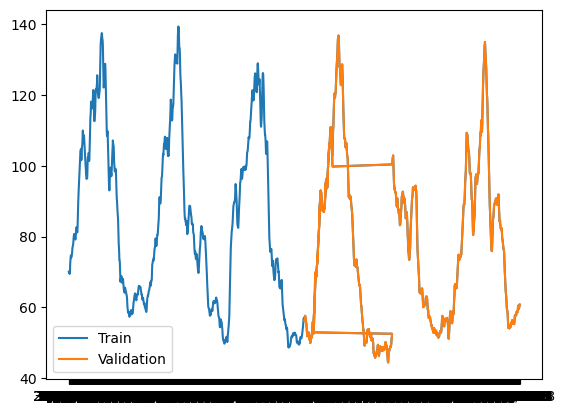

In [29]:
ratio = 0.5
split = int(len(df_train) * ratio)

#Step Lable 
dates_train,X_train, y_train =  df_train.iloc[:,0], df_train.iloc[:,2:], df_train.iloc[:,1]
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation'])

In [2]:
def get_params(multivar=False):
    lr = 3e-4
    n_steps=24*30
    n_horizon=24
    if multivar:
        n_features=5
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [30]:
# N = X_train.shape[1]
N = 100

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ModelCheckpoint


import tensorflow as tf

model = Sequential([
                    # Add the Input layer
                    layers.Input((X_train.shape[1], 1)),
                    # Add the first LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a second LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a third LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),

                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                     # Add a forth LSTM layer
                    layers.LSTM(N,return_sequences=False),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                    # Add a Dense
                    layers.Dense(64, activation='sigmoid'),
                    layers.Dropout(0.2),

                    layers.Dense(32, activation='sigmoid'),
                    layers.Dropout(0.2),    
                   
                    # Add the output layer
                    layers.Dense(1)])


model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 21, 100)           0         
                                                                 
 batch_normalization (Batch  (None, 21, 100)           400       
 Normalization)                                                  
                                                                 
 lstm_3 (LSTM)               (None, 21, 100)           80400     
                                                                 
 dropout_3 (Dropout)         (None, 21, 100)           0         
                                                                 
 batch_normalization_1 (Bat  (None, 21, 100)           400       
 chNormalization)                                       

In [31]:
def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr 
    else: 
        return lr 
#         return lr * tf.math.exp(-0.1)


# Compile the model
initial_learning_rate = 3e-4
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mse',metrics=['mean_absolute_error'])

# Define the learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_schedule)


early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

In [32]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[mc, lr_schedule,early_stopping],validation_data=(X_test, y_test))  #,validation_data=(X_test, y_test)

Epoch 1/200


2023-08-15 20:44:00.486871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:00.914228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.716019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.850612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.909416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:02.034939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:03.108218: I tensorflow/core/grappler/optimizers/cust

 1/68 [..............................] - ETA: 6:16 - loss: 8483.5801 - mean_absolute_error: 87.7422

2023-08-15 20:44:04.024570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 6819.5581 - mean_absolute_error: 79.0626

2023-08-15 20:44:08.371338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.514510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.579261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.629008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.671938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.713732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 11s 76ms/step - loss: 6819.5581 - mean_absolute_error: 79.0626 - val_loss: 6121.2339 - val_mean_absolute_error: 74.8574 - lr: 3.0000e-04
Epoch 2/200


/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/68 [==============================] - 3s 37ms/step - loss: 6563.5171 - mean_absolute_error: 77.4253 - val_loss: 5924.8501 - val_mean_absolute_error: 73.5381 - lr: 3.0000e-04
Epoch 3/200
68/68 [==============================] - 3s 38ms/step - loss: 6371.4536 - mean_absolute_error: 76.1578 - val_loss: 5756.6943 - val_mean_absolute_error: 72.3976 - lr: 3.0000e-04
Epoch 4/200
68/68 [==============================] - 2s 36ms/step - loss: 6221.5044 - mean_absolute_error: 75.1716 - val_loss: 5597.6230 - val_mean_absolute_error: 71.3067 - lr: 3.0000e-04
Epoch 5/200
68/68 [==============================] - 3s 37ms/step - loss: 6100.7876 - mean_absolute_error: 74.3657 - val_loss: 5470.2217 - val_mean_absolute_error: 70.4133 - lr: 3.0000e-04
Epoch 6/200
68/68 [==============================] - 2s 35ms/step - loss: 5999.0215 - mean_absolute_error: 73.6829 - val_loss: 5359.1680 - val_mean_absolute_error: 69.6129 - lr: 3.0000e-04
Epoch 7/200
68/68 [==============================] - 2s 35ms/step -

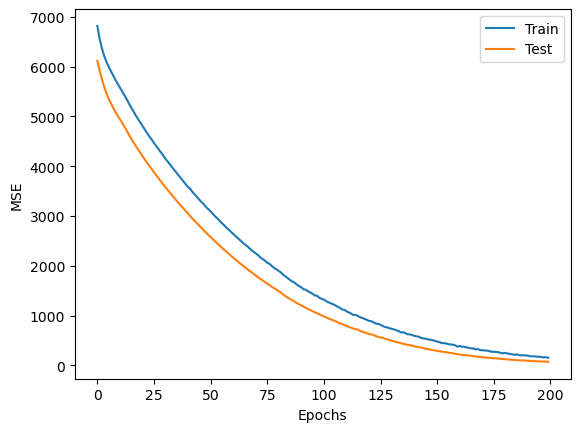

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train','Test']);

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

2023-08-15 20:58:41.693859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:41.885798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.047762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.126726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.173268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.230682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 2s 12ms/step


3.7510789316815116

In [35]:
mae = np.sqrt(mean_squared_error(preds, y_test))
print("Root Mean Squared Error (RMSE):", mae)

Root Mean Squared Error (RMSE): 8.347409809607445


In [90]:
date_df.to_csv("data_2024.csv", index=False)

In [ ]:
model.load_weights('/kaggle/working/best_model.h5')

68/68 [==============================] - 1s 9ms/step


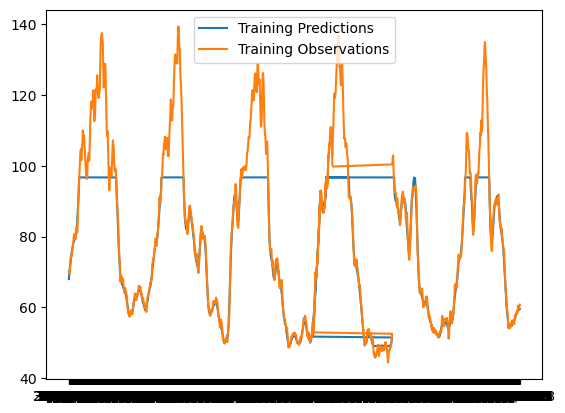

In [36]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

34/34 [==============================] - 0s 9ms/step


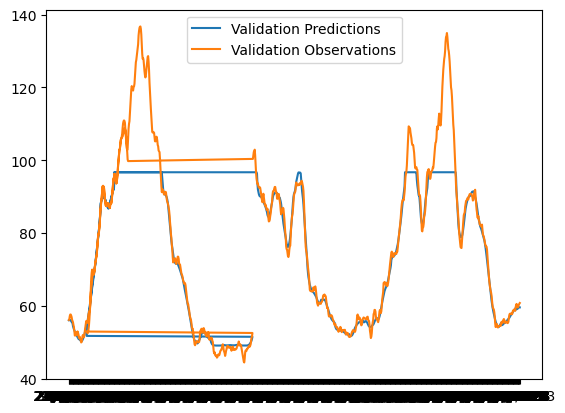

In [37]:
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [39]:
df_date = pd.read_csv("data_2024.csv")
df_date.loc[:, 'PM2.5'] = "0"

In [58]:
# Generate a date range from August 11, 2023, to December 31, 2024
start_date = '11-8-2023'
end_date = '31-12-2024'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame({'date': date_range})

# Format dates in 'dd/mm/yyyy' format
date_df['date'] = date_df['date'].dt.strftime('%d/%m/%Y')
# Display the DataFrame
date_df


/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1111671763.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_range = pd.date_range(start=start_date, end=end_date, freq='D')


,date
0,08/11/2023
1,09/11/2023
2,10/11/2023
3,11/11/2023
4,12/11/2023
...,...
415,27/12/2024
416,28/12/2024
417,29/12/2024
418,30/12/2024


In [59]:
date_df.to_csv('date_range_2024.csv', index=False)

In [60]:
df_date = pd.read_csv("date_range_2024.csv")
df_date.loc[:, ' pm25'] = ""
df_date

,date,pm25
0,08/11/2023,
1,09/11/2023,
2,10/11/2023,
3,11/11/2023,
4,12/11/2023,
...,...,...
415,27/12/2024,
416,28/12/2024,
417,29/12/2024,
418,30/12/2024,


In [61]:
df_all = df_train2.copy()
df_all = pd.concat([df_all,df_date])
df_all.reset_index(drop=True,inplace=True)
df_all


,date,pm25
0,30/7/2016,68.0
1,31/7/2016,68.0
2,1/8/2016,68.0
3,2/8/2016,69.75
4,3/8/2016,72.8
...,...,...
2974,27/12/2024,
2975,28/12/2024,
2976,29/12/2024,
2977,30/12/2024,


In [63]:
def create_fea(df):
    df['PM2.5_ma20'] = df_train[' pm25'].shift(-7).rolling(14, min_periods=1).mean()
    date_time = pd.to_datetime(df['date'], format='%d/%m/%Y')
    
    df['day'] = date_time.dt.strftime("%d").astype('int')
    df['month'] = date_time.dt.strftime("%m").astype('int')
    df['year'] = date_time.dt.strftime("%Y").astype('int')
    
    df['y_day'] = getattr(date_time.dt, 'dayofyear')
    df['y_quarter'] = getattr(date_time.dt, 'quarter')
    
    lags = [7, 30, 365]
    lag_cols = [f"lag_{lag}" for lag in lags]
    for lag, lag_col in zip(lags, lag_cols):
        df[lag_col] = df[" pm25"].shift(lag)
        
    wins = [5, 30]
    for win in wins:
        for lag, lag_col in zip(lags, lag_cols):
            # Convert column to numeric and handle missing values
            df[lag_col] = pd.to_numeric(df[lag_col], errors='coerce')
            df[f"Rmean_{lag}_{win}"] = df[lag_col].rolling(win).mean()
            df[f"Rstd_{lag}_{win}"] = df[lag_col].rolling(win).std()

# Call the function with your DataFrame
create_fea(df_all)


In [64]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27/12/2024,,NaN,27,12,2024,362,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975,28/12/2024,,NaN,28,12,2024,363,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2976,29/12/2024,,NaN,29,12,2024,364,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,30/12/2024,,NaN,30,12,2024,365,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
from tqdm.notebook import tqdm,trange
create_fea(df_all)

magic_num = [1.2]
all_result = []

for number in tqdm(magic_num):
    result_pre = []
    
    for day in trange(420):
        input_data = df_all.iloc[2558+day:2558+day+1, 2:]
        input_data = input_data.fillna(0)  # Fill NaN values with zeros
        print("Input Data:", input_data)  # Print input data for debugging
        
        result = model.predict(input_data).item()
        print("Prediction:", result)  # Print prediction for debugging
        
        df_all[' pm25'][2558+day] = result * number
        result_pre.append(result)
    
    all_result.append(result_pre)

ave_result = np.mean(np.stack(all_result), axis=0)



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2558         0.0   10      8  2023    222          3  60.545455    55.7   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2558  53.233333  59.601528  ...   55.593333   0.297583    53.033333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2558    0.293447   57.357532   1.611687    55.661111    1.513669   

      Rmean_365_30  Rstd_365_30  
2558     52.737778     0.739303  

[1 rows x 21 columns]
1/1 [==============================] - 0s 166ms/step
Prediction: 49.62860107421875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2559         0.0    8     11  2023    312          4  59.952381  55.566667   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2559     53.0  59.830466  ...   55.493333   0.142205    53.113333    0.177326   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_3

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.474403381347656
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter   lag_7     lag_30  \
2564         0.0   13     11  2023    317          4  60.625  56.766667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2564  54.533333  60.030724  ...   55.726667   0.602495    53.506667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2564    0.715464   58.201065   1.678192    55.193333    0.693837   

      Rmean_365_30  Rstd_365_30  
2564     52.725556     0.744825  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.45705795288086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2565         0.0   14     11  2023    318          4  39.702881    57.5   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2565     55.8    56.0513  ...   56.113333   0.977696    5

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.30330276489258
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2569         0.0   18     11  2023    322          4  39.604321  57.866667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2569  56.366667  39.695713  ...       57.78    0.15741    56.906667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2569    0.785776   55.568129   7.308921    55.735556    1.113551   

      Rmean_365_30  Rstd_365_30  
2569     53.318889     1.795091  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.26066970825195
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2570         0.0   19     11  2023    323          4  39.579523    58.0   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2570  56.366667  39.671041  ...       57.88   0.069121        

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.27867889404297
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2574         0.0   23     11  2023    327          4  39.493808  58.724138   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2574  55.066667   39.52196  ...   58.244828   0.462843         56.2   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2574    0.672062   52.635122   9.401172    56.375249    1.273528   

      Rmean_365_30  Rstd_365_30  
2574     53.937778     2.047552  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.28519058227539
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2575         0.0   24     11  2023    328          4  39.49556  58.857143   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2575  54.666667  39.505168  ...   58.416256   0.506198    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.47930908203125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2580         0.0   29     11  2023    333          4  39.550861  60.347826   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2580  56.833333  39.520049  ...   59.299844   0.703474        56.08   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2580    0.806432   48.930538  10.184799    57.203795    1.514128   

      Rmean_365_30  Rstd_365_30  
2580     54.726667     1.885768  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.60951232910156
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2581         0.0   30     11  2023    334          4  39.580325  60.545455   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2581  56.733333  39.536967  ...   59.601528   0.867023  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 50.42030715942383
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2586         0.0    5     12  2023    339          4  39.951505  60.294118   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2586     56.4  39.758398  ...     59.8962   0.306297    56.486667    0.134578   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2586   45.085192   9.227059     58.02801    1.687274     55.563333   

      Rstd_365_30  
2586     1.506216  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.778621673583984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2587         0.0    6     12  2023    340          4  40.111548  60.625   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2587     56.7  39.856721  ...   60.030724   0.450772   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.33938217163086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2592         0.0   11     12  2023    345          4  41.165033  39.604321   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2592  55.866667  43.524317  ...   39.695713   0.080957    56.413333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2592     0.56794   41.673625   5.457223    55.568129    7.308921   

      Rmean_365_30  Rstd_365_30  
2592     56.234444      0.87224  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.31931686401367
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2593         0.0   12     12  2023    346          4  40.440115  39.579523   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2593  54.933333  43.554208  ...   39.671041   0.095684  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.37141418457031
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2597         0.0   16     12  2023    350          4  39.634802  39.493808   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2597  51.566667  39.954187  ...    39.52196   0.046679    52.633333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2597    1.496106   40.327662   1.924545    52.635122    9.401172   

      Rmean_365_30  Rstd_365_30  
2597     55.695556      1.61463  

[1 rows x 21 columns]
1/1 [==============================] - 0s 14ms/step
Prediction: 49.37228775024414
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2598         0.0   17     12  2023    351          4  39.500845  39.49556   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2598  52.533333  39.766333  ...   39.505168    0.03424    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.341190338134766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2603         0.0   22     12  2023    356          4  39.389963  39.550861   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2603     58.0   39.40014  ...   39.520049   0.021616        56.32     1.55824   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2603   40.298918   1.937143    48.930538   10.184799     55.512222   

      Rstd_365_30  
2603     1.765972  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.332759857177734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2604         0.0   23     12  2023    357          4  39.389804  39.580325   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2604     58.9  39.393384  ...   39.536967   0.02

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 21ms/step
Prediction: 49.29877471923828
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2609         0.0   28     12  2023    362          4  39.388593  39.951505   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2609  56.366667  39.388069  ...   39.758398   0.131324    57.446667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2609    1.171561   40.275298   1.947697    45.085192    9.227059   

      Rmean_365_30  Rstd_365_30  
2609         55.94     2.010726  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.29179382324219
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2610         0.0   29     12  2023    363          4  39.391589  40.111548   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2610  56.266667  39.388584  ...   39.856721   0.177616  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.86968994140625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2615         0.0    3      1  2024      3          1  39.448203  41.165033   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2615     58.5  39.421461  ...   43.524317   3.344549    56.633333    1.220656   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2615   40.226205   1.965737    41.673625    5.457223     55.934444   

      Rstd_365_30  
2615     2.058912  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.964439392089844
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2616         0.0    4      1  2024      4          1  39.470416  40.440115   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2616     58.9  39.435762  ...   43.554208   3.308

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.89397048950195
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2621         0.0    9      1  2024      9          1  39.576981  39.500845   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2621  61.833333  41.370056  ...   39.766333    0.20927    59.413333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2621    1.625081   39.886242   1.662902    40.322905     1.92647   

      Rmean_365_30  Rstd_365_30  
2621         56.49     2.561731  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 50.02216720581055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2622         0.0   10      1  2024     10          1  39.589935  39.423581   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2622     62.9  41.388225  ...   39.641171    0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 115ms/step
Prediction: 50.0369758605957
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2626         0.0   14      1  2024     14          1  39.753644  39.389963   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2626  66.566667  39.689201  ...    39.40014   0.015087         65.2   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2626    1.708476    39.79107   1.641656    40.298918    1.937143   

      Rmean_365_30  Rstd_365_30  
2626     58.441111     3.749163  

[1 rows x 21 columns]
1/1 [==============================] - 0s 60ms/step
Prediction: 50.03207015991211
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2627         0.0   15      1  2024     15          1  39.628345  39.389804   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2627  66.466667  39.696883  ...   39.393384   0.007739  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number


1/1 [==============================] - 0s 18ms/step
Prediction: 50.02870559692383
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2628         0.0   16      1  2024     16          1  39.807379  39.389014   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2628  66.233333   39.72849  ...   39.389749   0.000692    66.393333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2628    0.132077   39.801072   1.640764      40.2919    1.940339   

      Rmean_365_30  Rstd_365_30  
2628     59.394444     3.820695  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 50.02098846435547
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2629         0.0   17      1  2024     17          1  39.829715  39.388098   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2629     65.7  39.752478  ...   39.389216   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.989437103271484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2634         0.0   22      1  2024     22          1  39.823892  39.398911   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2634     66.4  39.831363  ...   39.390746    0.00489    66.006667    0.398887   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2634   39.887606   1.628186    40.263942    1.952447     61.235556   

      Rstd_365_30  
2634     4.248443  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.98181915283203
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2635         0.0   23      1  2024     23          1  39.815054  39.408517   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2635  67.433333  39.825652  ...   39.394926   0.008865    6

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.921932220458984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2640         0.0   28      1  2024     28          1  39.771283  39.499088   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2640  73.633333  39.799634  ...   39.453876    0.03155    71.293333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2640    1.888768   39.970316    1.61058    40.189754     1.97424   

      Rmean_365_30  Rstd_365_30  
2640     63.915556     5.134316  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.865966796875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2641         0.0   29      1  2024     29          1  39.746893  39.535379   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2641  74.666667  39.785184  ...   39.476873    0.04141   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.387271881103516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2646         0.0    3      2  2024     34          1  39.616052  39.649344   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2646  73.566667   39.66558  ...   41.411018    3.93955    74.106667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2646    0.637007   40.020218   1.596481    39.807379    1.642195   

      Rmean_365_30  Rstd_365_30  
2646     67.353333     5.086016  

[1 rows x 21 columns]
1/1 [==============================] - 0s 14ms/step
Prediction: 49.47661209106445
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2647         0.0    4      2  2024     35          1  39.598364  39.709775   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2647     74.4  39.641407  ...   41.396567   3

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.5245246887207
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2652         0.0    9      2  2024     40          1  40.150455  39.829715   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2652     74.3  42.011492  ...   39.752478   0.078221    74.366667    0.078174   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2652   40.127405   2.105201     39.81461    1.639217     70.228889   

      Rstd_365_30  
2652     3.948352  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.73936462402344
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2653         0.0   10      2  2024     41          1  39.431125  39.843607   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2653  74.966667  41.980909  ...   39.772538   0.087582    74.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.7393684387207
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2658         0.0   15      2  2024     46          1  39.458795  39.815054   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2658     79.8  39.515319  ...   39.825652   0.012074    77.326667    1.977709   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2658   40.084603   2.115596    39.901808    1.625543     72.422222   

      Rstd_365_30  
2658     4.082036  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.71309280395508
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2659         0.0   16      2  2024     47          1  39.595963  39.819144   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2659     81.0  39.541094  ...   39.820235   0.00371

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.56438064575195
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2664         0.0   21      2  2024     52          1  39.613522  39.746893   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2664  88.066667  39.617392  ...   39.785184   0.026212    85.086667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2664    2.396247   40.041149   2.122815    39.981915    1.607574   

      Rmean_365_30  Rstd_365_30  
2664     76.112222     4.988297  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 49.54848861694336
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2665         0.0   22      2  2024     53          1  39.604721  39.719229   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2665     88.8  39.615538  ...   39.766408   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.478973388671875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2669         0.0   26      2  2024     57          1  39.543588  39.616052   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2669  90.066667  39.574213  ...    39.66558   0.041012        89.22   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2669    0.493063    40.00212   2.129104    40.020218    1.596481   

      Rmean_365_30  Rstd_365_30  
2669     79.306667     6.091149  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.451778411865234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2670         0.0   27      2  2024     58          1  39.532352  39.598364   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2670     91.3  39.559739  ...   39.641407   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 24ms/step
Prediction: 61.206783294677734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2674         0.0    2      3  2024     62          1  39.491776  51.254803   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2674     96.9  39.513198  ...   41.901074   5.229031    94.666667    2.311805   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2674    39.96793   2.135178    40.108721    2.107475         82.69   

      Rstd_365_30  
2674     7.901293  

[1 rows x 21 columns]
1/1 [==============================] - 0s 24ms/step
Prediction: 52.1734733581543
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2675         0.0    3      3  2024     63          1  39.48035  40.150455   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2675  98.533333  39.502797  ...   42.011492   5.173787    96.1

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 56ms/step
Prediction: 49.30147933959961
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter    lag_7     lag_30  \
2678         0.0    6      3  2024     66          1  39.4621  39.518289   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2678    106.9  39.473984  ...   41.964352   5.201911        101.5    4.040283   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2678   39.949309   2.138945    40.104541    2.111136     86.514444   

      Rstd_365_30  
2678     9.647002  

[1 rows x 21 columns]
1/1 [==============================] - 0s 21ms/step
Prediction: 49.34231948852539
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2679         0.0    7      3  2024     67          1  39.468311  39.555893   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2679    109.3  39.469291  ...    39.62457   0.297821  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.3678092956543
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2682         0.0   10      3  2024     70          1  41.087094  39.595963   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2682  108.733333  43.673209  ...   39.541094   0.054265   108.566667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2682    0.969822   40.230326   2.679942    40.076811    2.116997   

      Rmean_365_30  Rstd_365_30  
2682     91.133333    10.963618  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.384521484375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2683         0.0   11      3  2024     71          1  40.028168  39.613992   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2683    107.6  43.786423  ...   39.560235   0.060706   108.706667    0.674702   

      Rmean_7_30 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.392738342285156
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2688         0.0   16      3  2024     76          1  39.585654  39.604721   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2688  104.233333  39.646356  ...   39.615538   0.006657   105.226667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2688    1.164856   40.272067   2.670355    40.034138    2.123935   

      Rmean_365_30  Rstd_365_30  
2688     96.871111      9.35456  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.386558532714844
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2689         0.0   17      3  2024     77          1  39.551553  39.590244   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2689  104.066667  39.609495  ...   39.609442   0.01

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 35ms/step
Prediction: 49.364253997802734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2692         0.0   20      3  2024     80          1  39.542819  39.543588   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2692  99.966667  39.556613  ...   39.574213   0.024331   102.673333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2692    1.746329    40.26364   2.672595     40.00212    2.129104   

      Rmean_365_30  Rstd_365_30  
2692     99.455556     7.597783  

[1 rows x 21 columns]
1/1 [==============================] - 0s 21ms/step
Prediction: 49.360992431640625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2693         0.0   21      3  2024     81          1  39.535242  39.532352   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2693     98.2   39.54653  ...   39.559739   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.31135940551758
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2697         0.0   25      3  2024     85          1  39.518326  39.491776   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2697     97.5  39.526264  ...   39.513198   0.016014        97.92    0.293068   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2697     40.2513   2.675901     39.96793    2.135178    101.045556   

      Rstd_365_30  
2697     5.851617  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.29851531982422
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2698         0.0   26      3  2024     86          1  39.518445  39.48035   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2698  97.366667  39.522905  ...   39.502797   0.017299    97.7

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.261051177978516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2703         0.0   31      3  2024     91          1  39.536929  53.324469   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2703  90.466667  39.529194  ...   42.238115   6.197461        92.36   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2703    2.226033   40.250899   2.676002    40.406796    3.243975   

      Rmean_365_30  Rstd_365_30  
2703    101.168889     5.659948  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.2988395690918
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2704         0.0    1      4  2024     92          2  39.551791  45.024072   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2704  90.166667  39.535104  ...   43.348687   6.073983  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.2691764831543
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter    lag_7     lag_30  \
2709         0.0    6      4  2024     97          2  39.8371  39.558304   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2709  80.466667  39.695925  ...    40.00876   0.628635    83.693333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2709    3.470463   40.290672   2.665625    40.263137    2.672706   

      Rmean_365_30  Rstd_365_30  
2709     97.563333     8.516225  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.2696418762207
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2710         0.0    7      4  2024     98          2  39.992636  39.717587   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2710  81.633333  39.778459  ...   39.734859   0.178604        

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.31136703491211
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2714         0.0   11      4  2024    102          2  41.175372  39.55354   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2714  85.033333  44.795156  ...   39.591566   0.071995        83.08   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2714    1.610659   40.449875   2.784523    40.266198    2.671918   

      Rmean_365_30  Rstd_365_30  
2714     93.374444     8.438807  

[1 rows x 21 columns]
1/1 [==============================] - 0s 31ms/step
Prediction: 49.32481002807617
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2715         0.0   12      4  2024    103          2  40.357983  39.542819   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2715     85.9  44.868225  ...   39.556613   0.016728    83.933333    1.774511   

      Rmean_7_30  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.31828689575195
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2719         0.0   16      4  2024    107          2  39.76723  39.521494   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2719  95.333333  39.957509  ...   39.531163   0.008261    90.333333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2719    3.840067   40.507878   2.770919    40.253151    2.675396   

      Rmean_365_30  Rstd_365_30  
2719     90.984444     6.843241  

[1 rows x 21 columns]
1/1 [==============================] - 0s 22ms/step
Prediction: 49.31646728515625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2720         0.0   17      4  2024    108          2  39.669937  39.518326   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2720  96.766667    39.8199  ...   39.526264   0.006744    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.2747802734375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2725         0.0   22      4  2024    113          2  39.561346  39.531641   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2725     95.6  39.579855  ...   39.525497   0.005225    96.886667    0.772298   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2725    40.51894   2.767065    40.249789    2.676315     90.387778   

      Rstd_365_30  
2725     6.047155  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.2710075378418
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2726         0.0   23      4  2024    114          2  39.570377  39.536929   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2726  94.866667  39.570097  ...   39.529194   0.005519    96.4

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.25734329223633
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2731         0.0   28      4  2024    119          2  39.602466  39.755688   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2731     97.3  39.585142  ...   39.638864   0.081997    96.566667    0.869546   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2731   40.530954   2.762698    40.278379    2.668638     90.517778   

      Rstd_365_30  
2731     6.092491  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.26395797729492
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7   lag_30  \
2732         0.0   29      4  2024    120          2  39.627396  39.8371   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2732  98.033333  39.595264  ...   39.695925   0.102871        97

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 56.603607177734375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2736         0.0    3      5  2024    124          2  39.788876  42.924759   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2736  102.633333   39.70036  ...   44.527501   5.534396    99.686667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2736    2.000639   40.553547   2.755056    40.401892    2.783993   

      Rmean_365_30  Rstd_365_30  
2736     92.281111     6.933901  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 52.178466796875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2737         0.0    4      5  2024    125          2  39.859256  41.175372   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2737  103.766667  39.746732  ...   44.795156   5.27723

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 24ms/step
Prediction: 49.34639358520508
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2741         0.0    8      5  2024    129          2  52.090564  39.934018   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2741  108.733333  42.416448  ...   40.239138    0.56955   105.686667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2741    1.893351    40.54719   2.608085    40.500689    2.773186   

      Rmean_365_30  Rstd_365_30  
2741     96.318889     6.509885  

[1 rows x 21 columns]
1/1 [==============================] - 0s 21ms/step
Prediction: 49.46584701538086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2742         0.0    9      5  2024    130          2  46.637772  39.76723   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2742  109.333333  43.772151  ...   39.957509   0.248564

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 19ms/step
Prediction: 49.30522155761719
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2746         0.0   13      5  2024    134          2  40.317142  39.566946   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2746    112.8  42.493174  ...   39.643761    0.07868   110.353333    1.750175   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2746     40.5851   2.599757    40.516894    2.767811    100.527778   

      Rstd_365_30  
2746     6.023848  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.300514221191406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2747         0.0   14      5  2024    135          2  40.087173  39.55629   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2747  112.066667  41.183055  ...   39.601573   0.045468     

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.29152297973633
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2751         0.0   18      5  2024    139          2  39.774881  39.577826   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2751    113.3  39.958116  ...   39.568525   0.009479   111.133333    1.544704   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2751   40.620556   2.589347    40.524497     2.76504    103.316667   

      Rstd_365_30  
2751     6.351195  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.29319381713867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2752         0.0   19      5  2024    140          2  39.732147  39.580704   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2752  116.666667  39.887111  ...   39.573408   0.007727   1

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 24ms/step
Prediction: 49.339717864990234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2756         0.0   23      5  2024    144          2  39.686639  39.658658   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2756    126.5  39.702504  ...    39.61143   0.031868       122.14    3.881681   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2756   40.642624   2.580561    40.538203    2.760132    107.594444   

      Rstd_365_30  
2756     8.735391  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.34498977661133
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2757         0.0   24      5  2024    145          2  39.687579  39.693195   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2757    127.8  39.693591  ...   39.633928    0.04

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.414695739746094
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2761         0.0   28      5  2024    149          2  39.773157  39.941122   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2761  133.833333  39.723555  ...   39.803225   0.099127   130.553333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2761    2.568138   40.665693    2.57133    40.565597    2.751666   

      Rmean_365_30  Rstd_365_30  
2761    113.258889    10.669287  

[1 rows x 21 columns]
1/1 [==============================] - 0s 39ms/step
Prediction: 49.45637512207031
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2762         0.0   29      5  2024    150          2  39.796976  40.036548   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2762  134.133333  39.745434  ...   39.871896   0.120

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.6356086730957
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter    lag_7     lag_30  \
2765         0.0    1      6  2024    153          2  39.8832  46.637772   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2765  132.233333  39.824398  ...   43.772151   5.457217   133.793333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2765    0.981326    40.68689    2.56347     40.53916    2.588212   

      Rmean_365_30  Rstd_365_30  
2765    117.903333    11.015316  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 61.69412612915039
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2766         0.0    2      6  2024    154          2  39.925552  43.208423   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2766  130.566667  39.854877  ...   44.425612   5.065344   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 25ms/step
Prediction: 49.62232971191406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7   lag_30  \
2771         0.0    7      6  2024    159          2  40.193729  40.1215   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2771    122.2    40.0976  ...    40.56567   0.608035       126.54    3.113537   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2771   40.304971   1.386469    40.603037    2.595172        122.31   

      Rstd_365_30  
2771     9.311778  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.47257995605469
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2772         0.0    8      6  2024    160          2  51.041397  39.95939   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2772  120.033333  42.310377  ...   40.249197     0.3134   124.553

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.36710739135742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2776         0.0   12      6  2024    164          2  40.605783  39.709708   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2776  112.033333   44.31189  ...   39.804752   0.101179       116.74   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2776    3.292196    40.60809   2.319351    40.629869    2.585719   

      Rmean_365_30  Rstd_365_30  
2776    123.374444     8.204273  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 49.35841369628906
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2777         0.0   13      6  2024    165          2  40.292331  39.695993   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2777  109.733333  42.162077  ...   39.752073   0.0612

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.32357406616211
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2781         0.0   17      6  2024    169          2  39.888199  39.693692   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2781  99.833333  40.076863  ...   39.690388   0.004178   105.206667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2781    4.028399   40.627882   2.314071    40.650179    2.577493   

      Rmean_365_30  Rstd_365_30  
2781    122.386667     9.964083  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.32571029663086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2782         0.0   18      6  2024    170          2  39.829184  39.716498   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2782  96.433333  39.984234  ...   39.694489    0.01261   102.546667   

      Rstd_365_5  Rmean_7_30  Rstd_7

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.31245803833008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2787         0.0   23      6  2024    175          2  39.742377  39.848105   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2787     86.1  39.763979  ...   39.797128   0.039529    89.253333    2.771341   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2787   40.642848   2.308085    40.681906    2.565232        115.86   

      Rstd_365_30  
2787    16.299769  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.30229949951172
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7   lag_30  \
2788         0.0   24      6  2024    176          2  39.744669  39.8832   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2788     84.2   39.75356  ...   39.824398   0.043047  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.28006362915039
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2793         0.0   29      6  2024    181          2  39.773569  40.178079   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2793  76.166667  39.764614  ...   40.043965   0.099853        78.84   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2793    2.395876   40.643515   2.307738    40.701532    2.559072   

      Rmean_365_30  Rstd_365_30  
2793    105.338889    19.119139  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.27582931518555
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2794         0.0   30      6  2024    182          2  39.781998  40.193729   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2794  75.966667  39.770408  ...     40.0976   0.092069  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 51.50595474243164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2798         0.0    4      7  2024    186          3  39.921945  41.299127   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2798     82.0  39.844188  ...   44.229479   4.364549    78.253333    2.583882   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2798   40.628521    2.31268    40.598469    2.319959     96.536667   

      Rstd_365_30  
2798     17.26633  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 50.01969909667969
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2799         0.0    5      7  2024    187          3  39.971744  40.605783   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2799  83.333333  39.882137  ...    44.31189   4.272209    79.726667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.29945755004883
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2804         0.0   10      7  2024    192          3  42.730911  39.888199   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2804  88.033333  43.669069  ...   40.076863   0.152301        86.22   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2804    1.334291   40.568136   2.107811    40.627882    2.314071   

      Rmean_365_30  Rstd_365_30  
2804     89.324444     11.60427  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.27713394165039
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2805         0.0   11      7  2024    193          3  41.277567  39.829184   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2805  88.833333  43.917692  ...   39.984234   0.127279  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 14ms/step
Prediction: 49.25162124633789
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2810         0.0   16      7  2024    198          3  39.90531  39.742377   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2810  89.233333  40.173494  ...   39.763979     0.0223    89.273333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2810    0.250998   40.559603    2.10967    40.642848    2.308085   

      Rmean_365_30  Rstd_365_30  
2810     85.394444     6.041447  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.249759674072266
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2811         0.0   17      7  2024    199          3  39.810541  39.744669   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2811  90.033333  40.009618  ...    39.75356   0.013643   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 20ms/step
Prediction: 49.24225997924805
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2816         0.0   22      7  2024    204          3  39.640549  39.773569   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2816  90.666667  39.684846  ...   39.764614   0.008021    90.653333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2816    0.167664   40.540932   2.117022    40.643515    2.307738   

      Rmean_365_30  Rstd_365_30  
2816     84.956667     5.178264  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.24137878417969
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2817         0.0   23      7  2024    205          3  39.635861  39.781998   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2817  90.666667  39.662034  ...   39.770408   0.008021  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.25712585449219
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2822         0.0   28      7  2024    210          3  39.693234  39.971744   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2822  90.233333  39.659518  ...   39.882137   0.066771        89.66   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2822    0.592265   40.520829   2.125127    40.624169    2.313827   

      Rmean_365_30  Rstd_365_30  
2822     86.644444     4.920505  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.27273941040039
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2823         0.0   29      7  2024    211          3  39.722458  40.034454   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2823     90.9  39.676769  ...   39.928083   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 55.785743713378906
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2828         0.0    3      8  2024    216          3  40.015414  41.277567   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2828  86.566667  39.875895  ...   43.917692    3.88754    89.746667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2828    2.202599   40.524409   2.124299    40.567417    2.107556   

      Rmean_365_30  Rstd_365_30  
2828     89.051111     2.079949  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 51.956443786621094
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2829         0.0    4      8  2024    217          3  40.110822  40.629919   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2829  85.666667  39.946221  ...   44.018036    3.76997

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.318511962890625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2834         0.0    9      8  2024    222          3  46.027646  39.810541   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2834     83.2  43.435804  ...   40.009618   0.165584         84.0    0.582619   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2834   40.490168   2.156918    40.557014    2.110569     88.758889   

      Rstd_365_30  
2834     2.514703  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.26154708862305
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2835         0.0   10      8  2024    223          3  43.300986  39.749924   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2835  82.366667  44.049799  ...    39.90991   0.132625    8

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.24828338623047
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2840         0.0   15      8  2024    228          3  40.107986  39.635861   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2840  82.333333  40.680155  ...   39.662034   0.030073    82.133333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2840    0.201384   40.642059   2.219515    40.537381    2.118496   

      Rmean_365_30  Rstd_365_30  
2840     87.353333     3.634378  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.2491569519043
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2841         0.0   16      8  2024    229          3  39.941214  39.636203   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2841     80.8  40.308456  ...   39.647402   0.0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 35ms/step
Prediction: 49.248497009277344
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2846         0.0   21      8  2024    234          3  39.629111  39.722458   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2846     77.7  39.710543  ...   39.676769   0.031876         78.8    0.768476   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2846   40.650697   2.216185    40.519125    2.125767         85.07   

      Rstd_365_30  
2846     4.456708  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.24616241455078
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2847         0.0   22      8  2024    235          3  39.616971  39.759189   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2847     76.9  39.668609  ...   39.700088   0.041

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.23103713989258
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2852         0.0   27      8  2024    240          3  39.626279  40.110822   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2852  73.366667  39.618896  ...   39.946221   0.120792    75.566667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2852    1.296791   40.643297   2.219652    40.529045    2.123203   

      Rmean_365_30  Rstd_365_30  
2852     82.262222     5.005076  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.227996826171875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2853         0.0   28      8  2024    241          3  39.639935  40.231012   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2853     71.8  39.624146  ...   40.031145    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 59.07602310180664
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2858         0.0    2      9  2024    246          3  39.830643  43.300986   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2858  64.833333  39.736507  ...   44.049799   4.104793    67.253333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2858    2.172889   40.617315   2.229582    40.557615    2.213289   

      Rmean_365_30  Rstd_365_30  
2858     77.876667     5.959796  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 53.85604476928711
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2859         0.0    3      9  2024    247          3  39.913193  41.79971   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2859  64.133333  39.786475  ...   44.334381   3.826366    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.26359176635742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2864         0.0    8      9  2024    252          3  49.109933  39.941214   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2864     59.5  41.982004  ...   40.308456   0.387087         61.5    1.734134   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2864   40.368427   1.821429    40.646414    2.217955     73.408889   

      Rstd_365_30  
2864     7.709356  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.22664260864258
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2865         0.0    9      9  2024    253          3  45.415497  39.826642   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2865  59.233333    43.0635  ...   40.089577   0.232754      

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.343387603759766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2870         0.0   14      9  2024    258          3  39.729269  39.616971   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2870     54.2  40.862352  ...   39.668609   0.053276        56.74     2.01362   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2870   40.469277   2.014821    40.650068    2.216486     68.405556   

      Rstd_365_30  
2870     8.546085  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.35710525512695
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2871         0.0   15      9  2024    259          3  39.837906  39.613684   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2871  54.466667  40.267502  ...   39.641751   0.033409     

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.353328704833984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2876         0.0   20      9  2024    264          3  39.434171  39.639935   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2876     54.5  39.524844  ...   39.624146   0.009815    54.506667    0.391152   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2876   40.434884   2.029122    40.640546    2.220883     63.478889   

      Rstd_365_30  
2876     7.996687  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.34757614135742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2877         0.0   21      9  2024    265          3  39.417703  39.663351   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2877     54.5  39.473474  ...   39.633826   0.018

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.314884185791016
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2882         0.0   26      9  2024    270          3  39.399472  39.913193   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2882  55.166667  39.403523  ...   39.786475   0.087871    54.666667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2882    0.295334   40.392346   2.048577    40.610727    2.231422   

      Rmean_365_30  Rstd_365_30  
2882     59.248889     5.475643  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.30559539794922
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2883         0.0   27      9  2024    271          3  39.397925  40.008017   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2883  55.633333  39.401191  ...   39.849768   0.112834 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 57.59890365600586
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2888         0.0    2     10  2024    276          4  39.402658  45.415497   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2888     56.4  39.397766  ...     43.0635   4.051415    55.793333    0.524087   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2888   40.327822   2.074302    40.438911    1.973396          56.8   

      Rstd_365_30  
2888     3.032519  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 52.07191848754883
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2889         0.0    3     10  2024    277          4  39.413644  42.812155   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2889  56.066667  39.401182  ...   43.602697   3.727553    55

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.27556228637695
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2894         0.0    8     10  2024    282          4  48.437463  39.837906   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2894  55.566667  41.283365  ...   40.267502   0.649875    55.493333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2894    0.142205   40.194731    2.00148    40.465834    2.015843   

      Rmean_365_30  Rstd_365_30  
2894         55.53     1.328738  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.2322883605957
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2895         0.0    9     10  2024    283          4  45.005624  39.674557   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2895  55.566667  42.397733  ...   39.938049   0.310904   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.29381561279297
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2900         0.0   14     10  2024    288          4  39.482285  39.417703   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2900     57.5  40.498699  ...   39.473474   0.055121    56.113333    0.977696   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2900    40.12046   1.943175    40.428242    2.032215     55.303333   

      Rstd_365_30  
2900     0.786347  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.29970932006836
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2901         0.0   15     10  2024    289          4  39.583316  39.409583   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2901  57.833333  39.937751  ...   39.443972   0.034972    56.626667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.3044319152832
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2906         0.0   20     10  2024    294          4  39.381235  39.397925   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2906     57.7   39.41028  ...   39.401191   0.002766    57.853333    0.106979   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2906   40.092879   1.951174    40.384279    2.052116     55.973333   

      Rstd_365_30  
2906     1.158755  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.30344772338867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2907         0.0   21     10  2024    295          4  39.38121  39.396567   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2907  58.066667   39.39178  ...   39.399481   0.002342         

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.281558990478516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2912         0.0   26     10  2024    300          4  39.38638  39.413644   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2912  58.807692  39.384351  ...   39.401182   0.007519    58.831869   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2912    0.127115   40.088468   1.952799    40.311171    2.079743   

      Rmean_365_30  Rstd_365_30  
2912     56.786423     1.356359  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.277828216552734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2913         0.0   27     10  2024    301          4  39.387137  39.433786   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2913    58.64  39.385322  ...   39.408812    0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.22124481201172
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2918         0.0    1     11  2024    306          4  39.424796  45.005624   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2918     59.6  39.402881  ...   42.397733   4.129573    60.022466    0.415138   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2918    40.08896   1.952627    40.181069    1.965693       57.5915   

      Rstd_365_30  
2918     1.692098  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 57.40842819213867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2919         0.0    2     11  2024    307          4  39.445898  42.388055   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2919  59.578947   39.41424  ...   42.983077   3.803881    60

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.240909576416016
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2923         0.0    6     11  2024    311          4  39.698859  39.482285   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2923  39.702881  39.547802  ...   40.498699   1.181607      56.0513   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2923    9.146986   40.100494   1.949286     40.12046    1.943175   

      Rmean_365_30  Rstd_365_30  
2923     57.667828     3.755781  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.31245803833008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2924         0.0    7     11  2024    312          4  40.083493  39.583316   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2924  39.817722  39.675321  ...   39.937751   0.565626 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.34493637084961
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2929         0.0   12     11  2024    317          4  40.049612  39.381235   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2929  39.565646  43.317133  ...    39.41028   0.037982    39.620626   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2929    0.058108   40.107656   1.927829    40.092879    1.951174   

      Rmean_365_30  Rstd_365_30  
2929     54.458523     8.351175  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.35407638549805
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2930         0.0   13     11  2024    318          4  39.633984  39.38121   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2930  39.481549  41.577404  ...    39.39178    0.01484    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.383365631103516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7    lag_30  \
2935         0.0   18     11  2024    323          4  39.37482  39.38638   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2935  39.506058  39.447327  ...   39.384351   0.001654    39.496088   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2935    0.006152   40.112151   1.926545    40.088468    1.952799   

      Rmean_365_30  Rstd_365_30  
2935     50.793923     9.992277  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.382484436035156
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2936         0.0   19     11  2024    324          4  39.376968  39.387137   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2936  39.516556  39.430233  ...   39.385322   0.001557    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 14ms/step
Prediction: 49.36688232421875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2941         0.0   24     11  2024    329          4  39.391672  39.424796   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2941  39.668851  39.387771  ...   39.402881   0.014334    39.590201   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2941    0.055263   40.112751   1.926312     40.08896    1.952627   

      Rmean_365_30  Rstd_365_30  
2941     47.005564     9.931328  

[1 rows x 21 columns]
1/1 [==============================] - 0s 14ms/step
Prediction: 49.36219024658203
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2942         0.0   25     11  2024    330          4  39.391339  39.445898   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2942  39.731726  39.389699  ...    39.41424   0.021433  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 14ms/step
Prediction: 49.30556106567383
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2948         0.0    1     12  2024    336          4  39.383371  48.332626   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2948  45.024329  39.386255  ...   41.446982   3.855238    42.791349   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2948    3.872311   40.110256   1.927264    39.932928    1.697385   

      Rmean_365_30  Rstd_365_30  
2948     42.870512     7.139322  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 54.91501235961914
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7   lag_30  \
2949         0.0    2     12  2024    337          4  39.382556  44.9646   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2949  42.562857  39.384922  ...   42.535199   3.943484     4

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.29877853393555
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2954         0.0    7     12  2024    342          4  39.47186  39.462439   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2954  39.843015  39.404937  ...   40.476972   1.187219    40.260233   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2954    0.565254   40.063081   1.939142    40.108683    1.927602   

      Rmean_365_30  Rstd_365_30  
2954     40.330172      1.92366  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.30910873413086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2955         0.0    8     12  2024    343          4  47.175305  39.580569   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2955  39.634802  40.963467  ...   39.920538   0.578203    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.3166618347168
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2960         0.0   13     12  2024    348          4  39.410062  39.381699   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2960  39.3892  40.980422  ...   39.390458   0.029342    39.422316    0.046069   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2960   39.925006   1.649906    40.112025    1.926594     40.302228   

      Rstd_365_30  
2960     1.935621  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.3269157409668
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2961         0.0   14     12  2024    349          4  39.378604  39.385965   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2961  39.389963  40.055957  ...   39.379103   0.004636     39.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.34214782714844
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2966         0.0   19     12  2024    354          4  39.371536  39.390457   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2966  39.387021  39.375368  ...   39.390598   0.001064    39.388311   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2966    0.001108   39.913068   1.653414    40.113027    1.926204   

      Rmean_365_30  Rstd_365_30  
2966     40.280046     1.945633  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.341400146484375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2967         0.0   20     12  2024    355          4  39.377267  39.389218   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2967  39.388593  39.370854  ...   39.390657    0.00095 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.33163070678711
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2972         0.0   25     12  2024    360          4  39.38674  39.382556   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2972  39.431277  39.385761  ...   39.384922   0.002109    39.410138   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2972    0.016006   39.912264   1.653678    40.108145    1.928051   

      Rmean_365_30  Rstd_365_30  
2972     40.238598     1.961832  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.32862091064453
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2973         0.0   26     12  2024    361          4  39.386105  39.382654   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2973  39.448203  39.386487  ...   39.383903    0.00156    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.308326721191406


/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/3290763390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2558+day] = result * number


In [124]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27/12/2024,59.186201,NaN,27,12,2024,362,4,39.385254,39.384262,...,39.383508,0.000953,39.435762,0.024260,39.911986,1.653769,40.100447,1.930777,40.210169,1.970013
2975,28/12/2024,59.181912,NaN,28,12,2024,363,4,39.384219,39.388531,...,39.384275,0.002476,39.453876,0.031550,39.911869,1.653808,40.093518,1.933020,40.189754,1.974240
2976,29/12/2024,59.177751,NaN,29,12,2024,364,4,39.383145,39.397379,...,39.387076,0.006248,39.476873,0.041410,39.911766,1.653842,40.083468,1.935924,40.164578,1.977721
2977,30/12/2024,59.169992,NaN,30,12,2024,365,4,39.382150,39.471860,...,39.404937,0.037845,39.547023,0.135365,39.911681,1.653870,40.063081,1.939142,39.871355,1.177365


Text(0, 0.5, ' pm25')

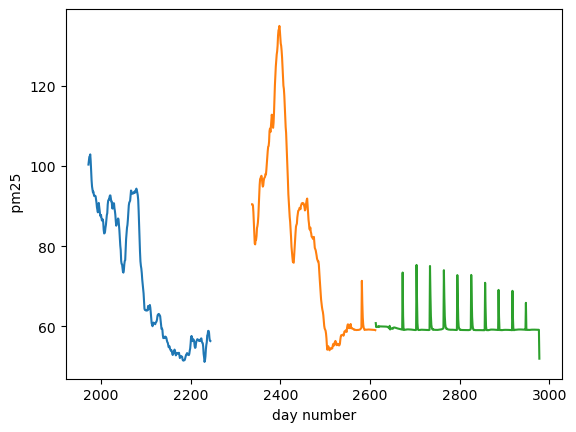

In [126]:
fig, ax = plt.subplots()
#ax.plot(df_all.loc[df_all['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())

ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

Text(0, 0.5, ' pm25')

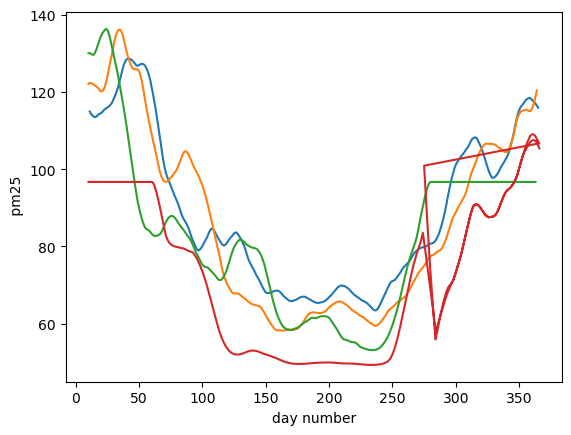

In [127]:
fig, ax = plt.subplots()
ax.plot(df_all.loc[df_all['year']==2017]['y_day'],df_all.loc[df_all['year']==2017][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2018]['y_day'],df_all.loc[df_all['year']==2018][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2019]['y_day'],df_all.loc[df_all['year']==2019][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2020]['y_day'],df_all.loc[df_all['year']==2020][' pm25'].rolling(10).mean())

ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

Text(0, 0.5, ' pm25')

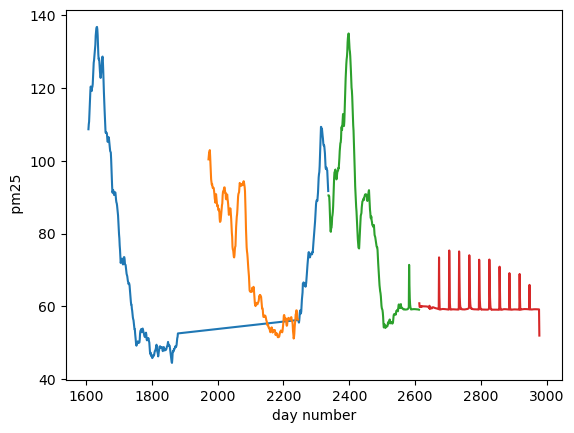

In [128]:
fig, ax = plt.subplots()
ax.plot(df_all.loc[df_all['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())



ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

In [102]:
df_all[' pm25']

0            68.0
1            68.0
2            68.0
3           69.75
4            72.8
          ...    
2974    49.309422
2975    49.346832
2976    49.400581
2977    49.477482
2978    51.974728
Name:  pm25, Length: 2979, dtype: object

In [106]:
df_date[' pm25'] = ave_result
df_date

,date,pm25
0,08/11/2023,49.628601
1,09/11/2023,49.772152
2,10/11/2023,49.637600
3,11/11/2023,49.554451
4,12/11/2023,49.505402
...,...,...
415,27/12/2024,49.283398
416,28/12/2024,49.309422
417,29/12/2024,49.346832
418,30/12/2024,49.400581


In [107]:
df_test = df_date.copy()
df_test

,date,pm25
0,08/11/2023,49.628601
1,09/11/2023,49.772152
2,10/11/2023,49.637600
3,11/11/2023,49.554451
4,12/11/2023,49.505402
...,...,...
415,27/12/2024,49.283398
416,28/12/2024,49.309422
417,29/12/2024,49.346832
418,30/12/2024,49.400581


In [108]:
create_fea(df_test)

In [109]:
df_test

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,08/11/2023,49.628601,73.333333,8,11,2023,312,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/11/2023,49.772152,73.683333,9,11,2023,313,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/11/2023,49.637600,74.011111,10,11,2023,314,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/11/2023,49.554451,74.091667,11,11,2023,315,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/11/2023,49.505402,74.093333,12,11,2023,316,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,27/12/2024,49.283398,87.611905,27,12,2024,362,4,49.231583,49.246223,...,49.219796,0.018442,49.193665,0.016603,49.875540,2.033666,50.117760,2.521779,49.659595,1.671450
416,28/12/2024,49.309422,88.354762,28,12,2024,363,4,49.232994,49.268425,...,49.233511,0.024428,49.205170,0.018243,49.876956,2.033187,50.109329,2.524264,49.660430,1.671221
417,29/12/2024,49.346832,89.147619,29,12,2024,364,4,49.235371,49.297794,...,49.251665,0.032286,49.220386,0.024147,49.878319,2.032728,50.098086,2.527198,49.661786,1.670865
418,30/12/2024,49.400581,90.026190,30,12,2024,365,4,49.239048,49.337116,...,49.275774,0.042818,49.240642,0.037958,49.879625,2.032289,50.082931,2.530460,49.663689,1.670402


Text(0, 0.5, ' pm25')

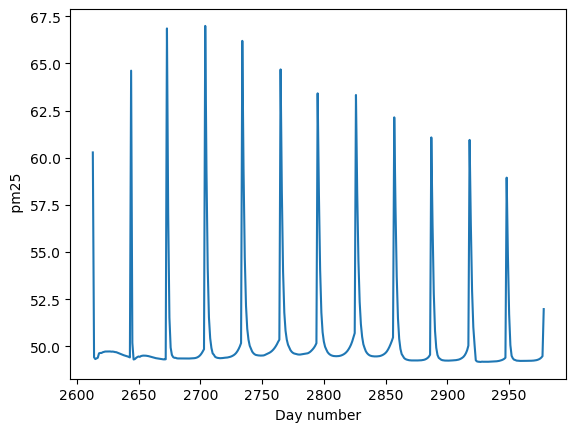

In [115]:
fig, ax = plt.subplots()
#ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
#ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())

ax.set_xlabel('Day number')
ax.set_ylabel(' pm25')

In [129]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27/12/2024,59.186201,NaN,27,12,2024,362,4,39.385254,39.384262,...,39.383508,0.000953,39.435762,0.024260,39.911986,1.653769,40.100447,1.930777,40.210169,1.970013
2975,28/12/2024,59.181912,NaN,28,12,2024,363,4,39.384219,39.388531,...,39.384275,0.002476,39.453876,0.031550,39.911869,1.653808,40.093518,1.933020,40.189754,1.974240
2976,29/12/2024,59.177751,NaN,29,12,2024,364,4,39.383145,39.397379,...,39.387076,0.006248,39.476873,0.041410,39.911766,1.653842,40.083468,1.935924,40.164578,1.977721
2977,30/12/2024,59.169992,NaN,30,12,2024,365,4,39.382150,39.471860,...,39.404937,0.037845,39.547023,0.135365,39.911681,1.653870,40.063081,1.939142,39.871355,1.177365


In [130]:
df_all.to_csv("data_2024.csv", index=False)